## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

# 1.- Eleccion Data Set y Importacion de Librerias

Para el proyecto final decidimos trabajar con el data set "Estadísticas demográficas de los ganadores del premio Oscar de la Academia".

Procederemos a importar nuestras librerias y nuestro data set:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Proyecto_7/Proyecto_7_Oscars.zip'

In [5]:
df = pd.read_csv(dataset_path, encoding='latin-1')

In [6]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


# 2.- Limpieza

A continuacion realizaremos el analisis exploratorio de datos. **texto en negrita**
Primero veremos que forma tiene y que tipos de datos contienen sus variables

In [7]:
df.shape

(441, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

Vemos que contiene 27 columnas y 441 filas, algunas de las cuales tiene varios datos nulos. Eliminaremos las variables que no consideramos relevantes

In [9]:
df = df.drop(columns=['birthplace_gold',
                      'date_of_birth_gold',
                      'race_ethnicity_gold',
                      'religion_gold',
                      'sexual_orientation_gold',
                      'year_of_award_gold',
                      'birthplace:confidence',
                      'date_of_birth:confidence',
                      'race_ethnicity:confidence',
                      'religion:confidence',
                      'sexual_orientation:confidence',
                      'year_of_award:confidence',
                      '_unit_id',
                      '_golden',
                      '_unit_state',
                      '_trusted_judgments',
                      '_last_judgment_at',
                      'biourl',
                      'movie']
             )

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   birthplace          441 non-null    object
 1   date_of_birth       441 non-null    object
 2   race_ethnicity      441 non-null    object
 3   religion            441 non-null    object
 4   sexual_orientation  441 non-null    object
 5   year_of_award       441 non-null    int64 
 6   award               441 non-null    object
 7   person              441 non-null    object
dtypes: int64(1), object(7)
memory usage: 27.7+ KB


Por ahora, nos quedamos con las 8 variables anteriores.
A continuacion, eliminaremos datos duplicados

In [11]:
df.duplicated().value_counts()

False    415
True      26
Name: count, dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 0 to 415
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   birthplace          415 non-null    object
 1   date_of_birth       415 non-null    object
 2   race_ethnicity      415 non-null    object
 3   religion            415 non-null    object
 4   sexual_orientation  415 non-null    object
 5   year_of_award       415 non-null    int64 
 6   award               415 non-null    object
 7   person              415 non-null    object
dtypes: int64(1), object(7)
memory usage: 29.2+ KB


Nuestro data set ha quedado con 415 filas, sin datos duplicados.
A continuacion revisaremos la variable 'date_of_birth', pues nos llama la atencion:

In [14]:
df.head(20)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,person
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Frank Borzage
5,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1934,Best Director,Frank Lloyd
6,"Bisacquino, Sicily, Italy",18-May-1897,White,Roman Catholic,Straight,1935,Best Director,Frank Capra
7,"Cape Elizabeth, Me",1-Feb-1894,White,Roman Catholic,Bisexual,1936,Best Director,John Ford
8,"Bisacquino, Sicily, Italy",18-May-1897,White,Roman Catholic,Straight,1937,Best Director,Frank Capra
9,"Los Angeles, Ca",3-Oct-1898,White,Na,Straight,1938,Best Director,Leo McCarey


Como vemos, hay algunas fechas con un formato como "24-Dec-1886" y otras como "11-Oct-18". Por los datos de la variable 'year_of_award', podemos asumir que, por ejemplo, los años en las fechas con formato "11-Oct-18", se refieren a años dentro del siglo XX.
A continuacion, vamos a separar los datos (usando el guion "-" como separador) de esta variable para homologar los formatos

In [15]:
def split_date_column(df, column_name):

    df['day_birth'] = df[column_name].str.split('-').str[0]
    df['month_birth'] = df[column_name].str.split('-').str[1]
    df['year_birth'] = df[column_name].str.split('-').str[2]

In [16]:
split_date_column(df, 'date_of_birth')

In [17]:
df.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,day_birth,month_birth,year_birth
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Lewis Milestone,30,Sep,1895
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,Frank Lloyd,2,Feb,1886
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,Lewis Milestone,30,Sep,1895
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Norman Taurog,23,Feb,1899
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Frank Borzage,23,Apr,1894


Aca, solo nos interesa el año. Eliminaremos las columnas que no nos sirven que se crearon por la separacion antes mencionada y ordenaremos el datas set de acuerdo a la variable 'year_birth':

In [18]:
df = df.drop(columns=['date_of_birth',
                      'day_birth',
                      'month_birth'
                     ]
             )

In [19]:
df = df.sort_values(by='year_birth', ascending=True)

In [20]:
df.head(15)

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,year_birth
265,"London, England",White,Na,Straight,1942,Best Actress,Greer Garson,04
218,"London, England",White,Na,Gay,1982,Best Supporting Actor,John Gielgud,04
222,"Kenosha, Wi",White,Roman Catholic,Straight,1986,Best Supporting Actor,Don Ameche,04
29,"Oakland, Ca",White,Na,Straight,1957,Best Director,George Stevens,04
24,"Oakland, Ca",White,Na,Straight,1952,Best Director,George Stevens,04
268,"San Antonio, Tx",White,Christian Science,Bisexual,1946,Best Actress,Joan Crawford,05
140,"Grand Island, Ne",White,Na,Straight,1982,Best Actor,Henry Fonda,05
98,"Withington, Manchester, England",White,Na,Straight,1940,Best Actor,Robert Donat,05
42,"London, England",White,Na,Straight,1969,Best Director,Carol Reed,06
343,"Quincy, Il",White,Roman Catholic,Straight,1942,Best Supporting Actress,Mary Astor,06


Convertiremos la variable 'year_birth' a integer:

In [21]:
df['year_birth'] = df['year_birth'].astype(int)

ValueError: invalid literal for int() with base 10: '1936 [1]'

El intento de conversion arrojo un error, pues uno de los datos tiene la siguiente forma: 1936 [1]. Buscaremos ese dato:

In [22]:
df[df['year_birth'].str.contains('\[', na=False)]

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,year_birth
54,"Santa Monica, Ca",White,Na,Straight,1980,Best Director,Robert Redford,1936 [1]


Revisaremos si hay mas datos similares

In [23]:
df['year_birth'].unique()

array(['04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '1868', '1875', '1877', '1878', '1879',
       '1880', '1883', '1884', '1885', '1886', '1887', '1888', '1889',
       '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899', '19', '1900', '1901', '1902', '1903', '1936 [1]', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '79', '81', '82', '83', '90', nan], dtype=object)

Vemos que no hay datos con forma similar, pero si hay un dato nulo.
Lidiaremos con esos datos.
Primero, el dato '1936 [1]', lo cambiaremos por '1936'

In [24]:
df['year_birth'] = df['year_birth'].str.replace('1936 [1]', '1936')

In [25]:
df['year_birth'].unique()

array(['04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '1868', '1875', '1877', '1878', '1879',
       '1880', '1883', '1884', '1885', '1886', '1887', '1888', '1889',
       '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899', '19', '1900', '1901', '1902', '1903', '1936', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '79', '81', '82', '83', '90', nan], dtype=object)

Para rescatar el dato nulo, veremos el nombre del ganador, buscaremos la fecha de nacimiento en imdb y completaremos el dato:

In [26]:
df[df.isna().any(axis=1)]

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,year_birth
84,"London, England",White,Na,Na,2011,Best Director,Tom Hooper,NaN


Se trata del director Tom Hooper quien, de acuerdo a IMDB, nacio en 1972:

Link con el dato: https://www.imdb.com/name/nm0393799/

Pasaremos a completar el dato:

In [27]:
df.loc[84, 'year_birth'] = '1972'

In [28]:
df.loc[[84]]

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,year_birth
84,"London, England",White,Na,Na,2011,Best Director,Tom Hooper,1972


Ahora transformaremos la variable 'year_birth' a integer y ordenaremos el data set nuevamente

In [29]:
df['year_birth'] = df['year_birth'].astype(int)

In [30]:
df.dtypes

birthplace            object
race_ethnicity        object
religion              object
sexual_orientation    object
year_of_award          int64
award                 object
person                object
year_birth             int64
dtype: object

In [31]:
df = df.sort_values(by='year_birth', ascending=True)

In [32]:
df['year_birth'].unique()

array([   4,    5,    6,    7,    8,    9,   10,   11,   12,   13,   14,
         15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,
         26,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,
         37,   38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
         48,   49,   50,   51,   52,   53,   54,   55,   56,   57,   58,
         59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
         70,   71,   72,   73,   74,   75,   76,   79,   81,   82,   83,
         90, 1868, 1875, 1877, 1878, 1879, 1880, 1883, 1884, 1885, 1886,
       1887, 1888, 1889, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1936, 1972])

Como vemos, ha años con una o dos cifras. Como señalamos anteriormente, por la fecha de obtencion del premio, podemos asumir que estos años son años dentro del siglo XX (pues por ejemplo, si "4" fuera 1804, tendrias personas que hubieran obtenido el primero a finales del siglo XIX, lo cual no es asi).

Lo que haremos a continuacion, sera filtrar por numeros dentro del rango 4 y 9 y a esos numeros concatenarlos con "190" para formar el año completo.

Despues, haremos lo mismo con los numeros dentro del rango 10 y 90, concatenandolos con el numero "19" para formar el año completo.

Luego, ordenaremos el data set de acuerdo a esta variable para revisar los resultados:

In [33]:
df[(df['year_birth'] >= 4) & (df['year_birth'] <= 9)]

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,year_birth
24,"Oakland, Ca",White,Na,Straight,1952,Best Director,George Stevens,4
222,"Kenosha, Wi",White,Roman Catholic,Straight,1986,Best Supporting Actor,Don Ameche,4
29,"Oakland, Ca",White,Na,Straight,1957,Best Director,George Stevens,4
218,"London, England",White,Na,Gay,1982,Best Supporting Actor,John Gielgud,4
265,"London, England",White,Na,Straight,1942,Best Actress,Greer Garson,4
140,"Grand Island, Ne",White,Na,Straight,1982,Best Actor,Henry Fonda,5
98,"Withington, Manchester, England",White,Na,Straight,1940,Best Actor,Robert Donat,5
268,"San Antonio, Tx",White,Christian Science,Bisexual,1946,Best Actress,Joan Crawford,5
33,"Sucha, Galicia, Austria",White,Jewish,Straight,1961,Best Director,Billy Wilder,6
251,"Philadelphia, Pa",White,Na,Straight,1929,Best Actress,Janet Gaynor,6


In [34]:
df.loc[(df['year_birth'] >= 4) & (df['year_birth'] <= 9), 'year_birth'] = df.loc[(df['year_birth'] >= 4) & (df['year_birth'] <= 9), 'year_birth'].apply(lambda x: int(f'190{x}'))

In [35]:
df[(df['year_birth'] >= 60) & (df['year_birth'] <= 90)]

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,year_birth
167,"Burbank, Ca",White,Roman Catholic,Straight,2009,Best Actor,Sean Penn,60
162,"Burbank, Ca",White,Roman Catholic,Straight,2003,Best Actor,Sean Penn,60
169,"Grayshott, Hampshire, England",White,Na,Straight,2011,Best Actor,Colin Firth,60
409,"London, England",White,Na,Straight,2007,Best Supporting Actress,Tilda Swinton,60
412,New York City,White,Na,Straight,2011,Best Supporting Actress,Melissa Leo,60
217,"Malibu, Ca",White,Na,Straight,1981,Best Supporting Actor,Timothy Hutton,60
242,"Lexington, Ky",White,Na,Straight,2006,Best Supporting Actor,George Clooney,61
165,"Longview, Tx",Black,Na,Straight,2007,Best Actor,Forest Whitaker,61
77,"Wellington, New Zealand",White,Na,Straight,2004,Best Director,Peter Jackson,61
315,"Los Angeles, Ca",White,Atheist,Lesbian,1992,Best Actress,Jodie Foster,62


In [36]:
df.loc[(df['year_birth'] >= 10) & (df['year_birth'] <= 90), 'year_birth'] = df.loc[(df['year_birth'] >= 10) & (df['year_birth'] <= 90), 'year_birth'].apply(lambda x: int(f'19{x}'))

In [37]:
df = df.sort_values(by='year_birth', ascending=True)

In [38]:
df['year_birth'].unique()

array([1868, 1875, 1877, 1878, 1879, 1880, 1883, 1884, 1885, 1886, 1887,
       1888, 1889, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899,
       1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1979, 1981, 1982, 1983, 1990])

In [39]:
df['year_of_award'].unique()

array([1930, 1931, 1948, 1944, 1945, 1941, 1942, 1936, 1940, 1929, 1949,
       1932, 1951, 1934, 1939, 1938, 1964, 1933, 1953, 1937, 1927, 1969,
       1976, 1935, 1947, 1952, 1965, 1943, 1971, 1963, 1946, 1980, 1960,
       1974, 1950, 1959, 1982, 1957, 1986, 1961, 1985, 1954, 1967, 1968,
       1970, 1956, 1958, 1955, 1990, 1977, 1966, 1975, 1962, 1972, 1992,
       1973, 1978, 1987, 1999, 2012, 1988, 1993, 2005, 1995, 1984, 2003,
       2000, 2007, 1979, 1983, 1997, 1981, 1989, 1991, 1994, 1996, 2002,
       2010, 1998, 2009, 2006, 2008, 2013, 2004, 2001, 2011, 2014])

Tuvimos exito en nuestra tarea.

Ahora, agregaremos una variable llamada 'Edad_Obtencion_Oscar", que será el resultado de la diferencia entre las variables 'year_of_award' y 'year_birth'.

Con esto podremos saber si hay alguna correlacion interesante.

In [40]:
df['Edad_Obtencion_Oscar'] = df['year_of_award'] - df['year_birth']

In [41]:
df.head()

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,year_birth,Edad_Obtencion_Oscar
89,"London, England",White,Na,Straight,1930,Best Actor,George Arliss,1868,62
254,"Cobourg, Ontario, Canada",White,Na,Straight,1931,Best Actress,Marie Dressler,1868,63
184,"Vale of Glamorgan, Wales",White,Na,Na,1948,Best Supporting Actor,Edmund Gwenn,1875,73
180,"Savannah, Ga",White,Na,Straight,1944,Best Supporting Actor,Charles Coburn,1877,67
90,"Philadelphia, Pa",White,Roman Catholic,Straight,1931,Best Actor,Lionel Barrymore,1878,53


In [42]:
df['Edad_Obtencion_Oscar'].unique()

array([62, 63, 73, 67, 53, 66, 57, 45, 65, 47, 48, 44, 58, 41, 46, 72, 38,
       42, 39, 59, 36, 32, 80, 50, 40, 55, 33, 35, 71, 34, 52, 79, 28, 43,
       56, 78, 82, 77, 23, 27, 60, 61, 75, 31, 81, 30, 25, 54, 37, 24, 49,
       83, 26, 29, 64, 70, 68, 17, 51, 21, 11, 22, 12])

Vemos que hay ganadores con edades "11" y "12". Quizas hay un error o quizas sean outlagers. Revisaremos esos datos:

In [43]:
df_filtrado = df[df['Edad_Obtencion_Oscar'].isin([11, 12])]

In [44]:
df_filtrado

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,person,year_birth,Edad_Obtencion_Oscar
375,"Los Angeles, Ca",White,Na,Straight,1974,Best Supporting Actress,Tatum O'Neal,1963,11
395,"Winnipeg, Manitoba, Canada",White,Na,Bisexual,1994,Best Supporting Actress,Anna Paquin,1982,12


Como vemos, realmente dichas personas ganaron premios a temprana edad. Esto se puede validar en IMDB:

Tatum O'Neal: https://www.imdb.com/name/nm0001575/?ref_=nv_sr_srsg_0_tt_2_nm_6_in_0_q_Tatum%2520O%27Neal

Anna Paquin: https://www.imdb.com/name/nm0001593/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_Anna%2520Paquin


Finalmente, eliminaremos la columna 'person' y mostraremos como quedara nuestro data frame

In [45]:
df = df.drop(columns=['person',])

In [46]:
df.head()

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,year_birth,Edad_Obtencion_Oscar
89,"London, England",White,Na,Straight,1930,Best Actor,1868,62
254,"Cobourg, Ontario, Canada",White,Na,Straight,1931,Best Actress,1868,63
184,"Vale of Glamorgan, Wales",White,Na,Na,1948,Best Supporting Actor,1875,73
180,"Savannah, Ga",White,Na,Straight,1944,Best Supporting Actor,1877,67
90,"Philadelphia, Pa",White,Roman Catholic,Straight,1931,Best Actor,1878,53


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 89 to 336
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   birthplace            415 non-null    object
 1   race_ethnicity        415 non-null    object
 2   religion              415 non-null    object
 3   sexual_orientation    415 non-null    object
 4   year_of_award         415 non-null    int64 
 5   award                 415 non-null    object
 6   year_birth            415 non-null    int64 
 7   Edad_Obtencion_Oscar  415 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 29.2+ KB


# 3.- EDA

Distribución del Año del Premio (year_of_award)

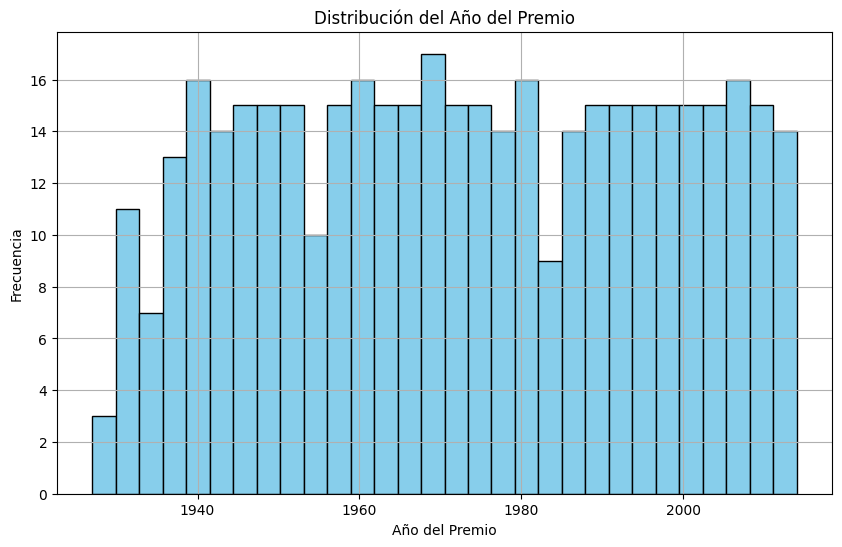

In [96]:
# Distribución de year_of_award
plt.figure(figsize=(10, 6))
plt.hist(df['year_of_award'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Año del Premio')
plt.xlabel('Año del Premio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Vemos que la distribucion es mas o menos pareja, viendo la mayor cantidad de premios entregados en los años '70. En los años 30' se ve un descenso en la entrega de premios. Esto coincide con la recesion del '29

Distribución de la Edad de Obtención del Oscar (Edad_Obtencion_Oscar)

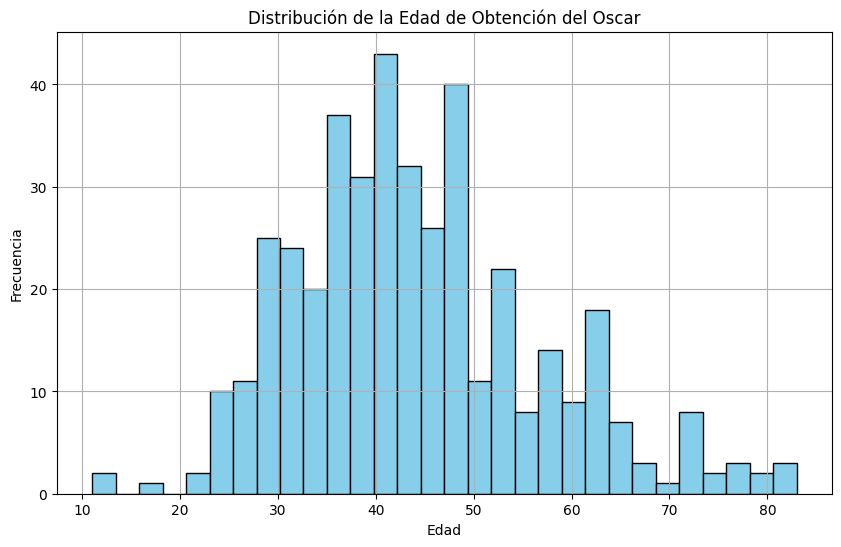

In [97]:
plt.figure(figsize=(10, 6))
plt.hist(df['Edad_Obtencion_Oscar'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Edad de Obtención del Oscar')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La mayoría de las personas recibieron un premio entre los 30 y 40 años, mostrando que la madurez de la carrera artística se alcanza en la adultez media. Aunque hay un peak de edad común, los premios se otorgan a personas dentro de una amplia gama de edades

Distribución de Premios (award)

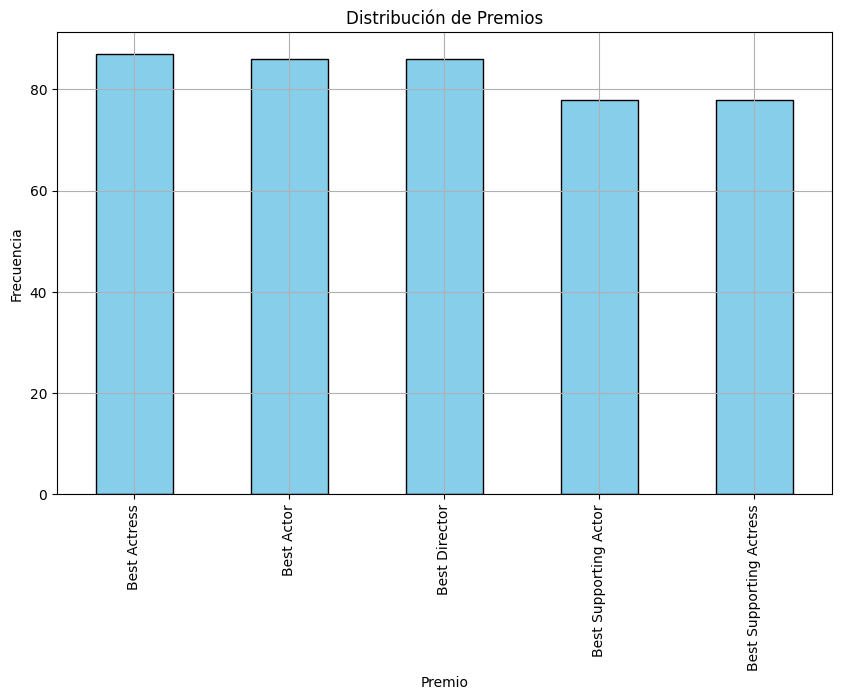

In [99]:
plt.figure(figsize=(10, 6))
df['award'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Premios')
plt.xlabel('Premio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La distribucion de premios es sumamente pareja, aunque podemos ver que los premios con mayor frecuencia son "Mejor Actriz", "Mejor Actor" y "Mejor Director"

Distribución de Raza/Etnicidad (race_ethnicity)

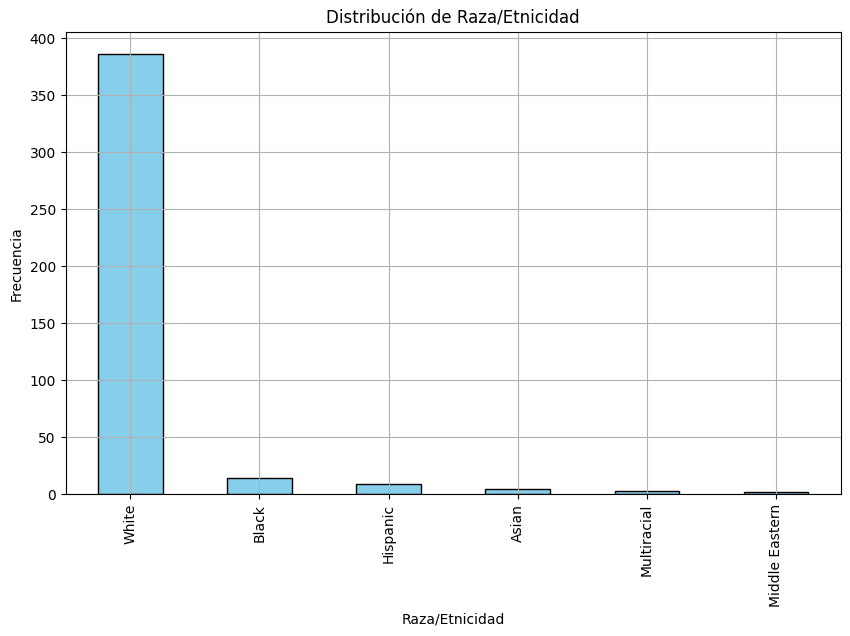

In [57]:
plt.figure(figsize=(10, 6))
df['race_ethnicity'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Raza/Etnicidad')
plt.xlabel('Raza/Etnicidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Vemos que la gran mayoria de los premios fueron entregados a persona de etnia caucasica, lo cual podría reflejar sesgos de caracter historico, propios de la industria (considerando el rango de tiempo que abarca el data set). Siendo esta nuestra variable objetivo, y de acuerdo al feedback mencionado en el "Demo Day", será de vital importancia considerar esto, dado el sesgo mencionado

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

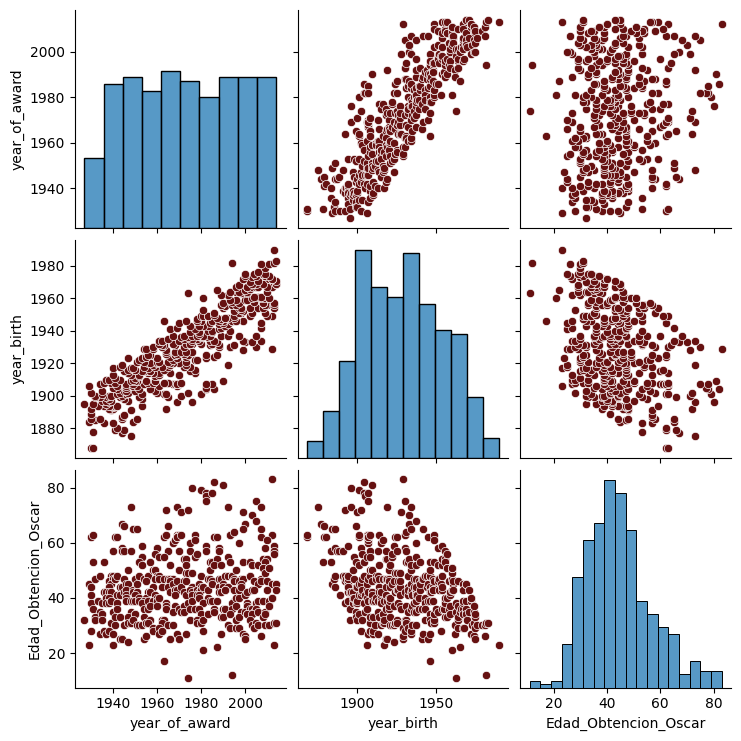

In [100]:
sns.pairplot(df, plot_kws={"color": '#661111'})
dir(sns.pairplot)

Aca tenemos un pairplot resumiendo lo anterior. Cabe señalar que existe una fuerte correlacion entre el año de nacimiento y el año de premio, lo caul es esperado, ya que las personas nacidas en años recientes recibieron premios en años recientes

Distribución de Religión (religion)

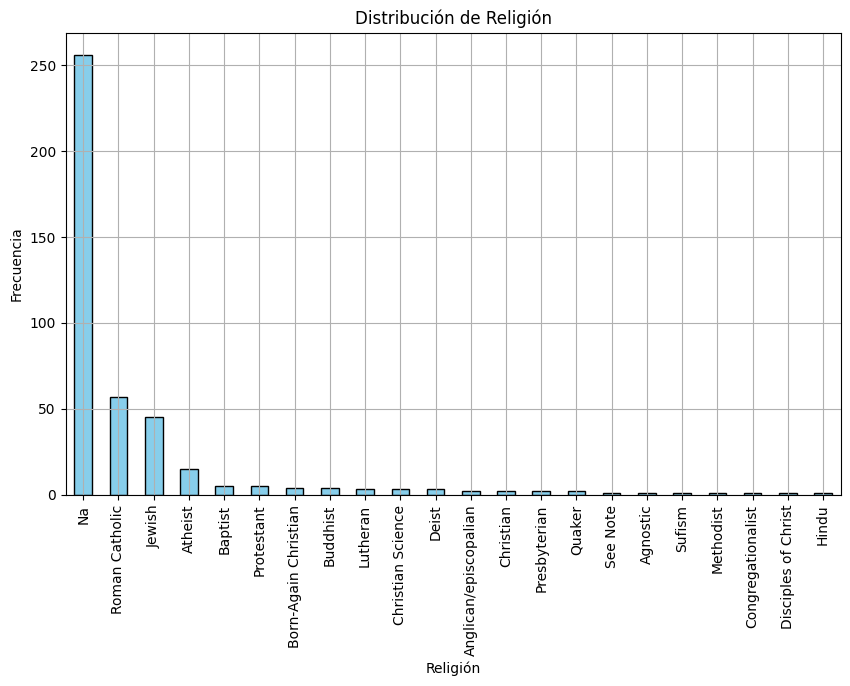

In [59]:
plt.figure(figsize=(10, 6))
df['religion'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Religión')
plt.xlabel('Religión')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Lo mismo que con la etnia, tambien hay un sesgo en cuanto a la religion. La mayoria de los artistas no declararon ninguna en particular

Distribución de Orientación Sexual (sexual_orientation)

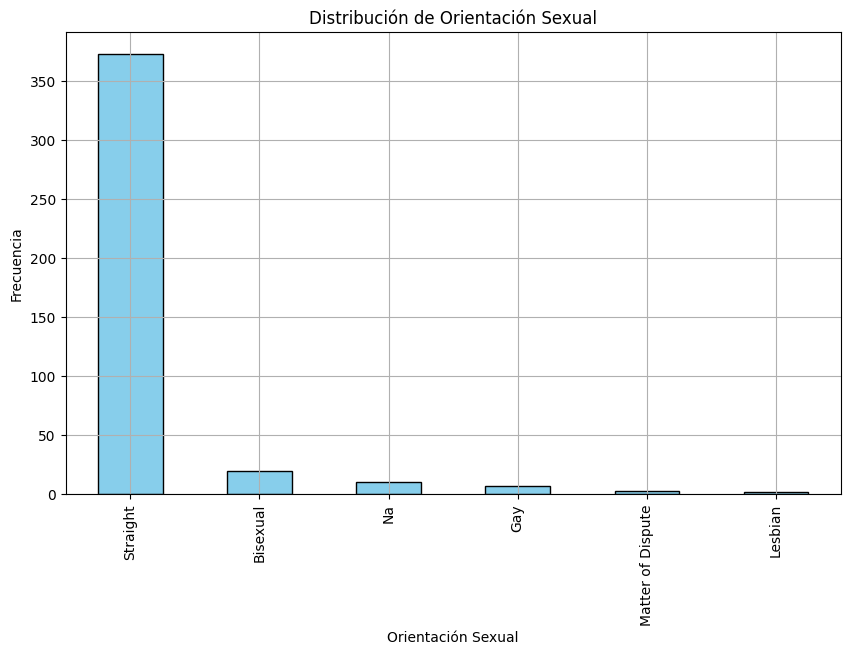

In [60]:
plt.figure(figsize=(10, 6))
df['sexual_orientation'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Orientación Sexual')
plt.xlabel('Orientación Sexual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Vemos que en cuanto a orientacion sexual, la amplia mayoria se declara heterosexual.

A continuacion, utilizaremos el metodo Label Encoder para transformar las variables categoricas en numericas

In [51]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':

        original_classes = label_encoder.fit(df[col]).classes_
        transformed_classes = label_encoder.transform(original_classes)


        print(f"Columna '{col}':")
        for original, transformed in zip(original_classes, transformed_classes):
            print(f"  {original} -> {transformed}")


        df[col] = label_encoder.transform(df[col])
        print(f"  Primeros valores transformados de '{col}':")
        print(df[col].head())

Columna 'birthplace':
  Arlington, Va -> 0
  Astoria, Ny -> 1
  Athens, Ga -> 2
  Athens, Greece -> 3
  Atlanta, Ga -> 4
  Baldwin, Ny -> 5
  Baltimore, Md -> 6
  Bascom, Fl -> 7
  Benoni, South Africa -> 8
  Berlin, Germany -> 9
  Bermondsey, England -> 10
  Birkenhead, Cheshire, England -> 11
  Birmingham, Al -> 12
  Bisacquino, Sicily, Italy -> 13
  Bossier City, La -> 14
  Bramhall, Cheshire, England -> 15
  Bronx, Ny -> 16
  Brooklyn, Ny -> 17
  Brussels, Belgium -> 18
  Bucharest, Romania -> 19
  Budapest, Hungary -> 20
  Burbank, Ca -> 21
  Cadiz, Oh -> 22
  Cambridge, England -> 23
  Cape Elizabeth, Me -> 24
  Catskill Mountains, Ny -> 25
  Chabua, Assam, India -> 26
  Charleroi, Pa -> 27
  Chicago, Il -> 28
  Chihuahua, Mexico -> 29
  Chisinau, Moldova -> 30
  Chiswick, London, England -> 31
  Cincinnati, Oh -> 32
  Cleveland, Oh -> 33
  Cloquet, Mn -> 34
  Cobourg, Ontario, Canada -> 35
  Columbus, Oh -> 36
  Concord, Ca -> 37
  Conyers, Ga -> 38
  Cowes, Isle of Wight, Engla

In [102]:
df.head()

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,year_birth,Edad_Obtencion_Oscar
89,96,5,15,5,1930,0,1868,62
254,35,5,15,5,1931,1,1868,63
184,210,5,15,4,1948,3,1875,73
180,181,5,15,5,1944,3,1877,67
90,153,5,19,5,1931,0,1878,53


Visualización de Correlaciones

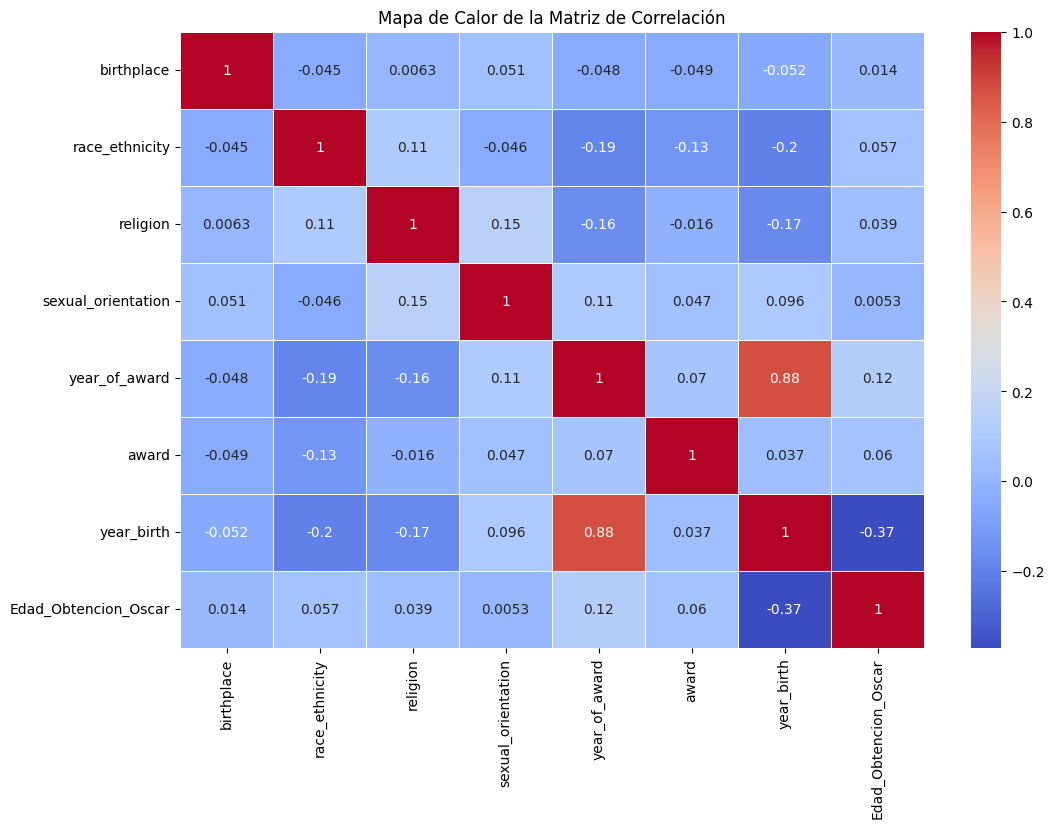

In [64]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

El mapa de calor confirma lo que nos mostro el pair plot con respecto a la correlacion entre el año de entrga del premio y el año de nacimiento

# 4.- Entrenamiento de los modelos

Division del df en variables independientes (X) y dependiente (y)

In [52]:
X = df.drop(columns=['race_ethnicity'])
y = df['race_ethnicity']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Escalamiento:

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Implementación de Modelo Gradient Boosting Classifier.


In [55]:
model_boost = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42
).fit(X_train_scaled, y_train)

Clasificacion y evaluación Modelo Gradient Boosting Classifier.

In [56]:
y_pred_boost = model_boost.predict(X_test_scaled)
accuracy_boost = accuracy_score(y_test, y_pred_boost)
report_boost = classification_report(y_test, y_pred_boost)

print("Accuracy con Boosting (Gradient Boosting):", accuracy_boost)
print("Reporte de Clasificación con Boosting (Gradient Boosting):\n", report_boost)

Accuracy con Boosting (Gradient Boosting): 0.936
Reporte de Clasificación con Boosting (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           5       0.94      0.99      0.97       118

    accuracy                           0.94       125
   macro avg       0.19      0.20      0.19       125
weighted avg       0.89      0.94      0.91       125



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
y_prob_boost = model_boost.predict_proba(X_test_scaled)[:, 1]
fpr_boost, tpr_boost, _ = roc_curve(y_test, y_prob_boost, pos_label=5)
roc_auc_boost = auc(fpr_boost, tpr_boost)

Entrenamiento con Modelo Random Forest

En este modelo, aplicaremos la opcion "class_weight='balanced" para lidiar con el sesgo del data set, reajustando los pesos de las clases

In [58]:
modelo_rrff = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
modelo_rrff.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Clasificacion y Evaluacion Modelo Random Forest

In [59]:
y_pred_rrff = modelo_rrff.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rrff)
report = classification_report(y_test, y_pred_rrff)

print(f'Accuracy: {accuracy}')

print(report)

Accuracy: 0.944
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           5       0.94      1.00      0.97       118

    accuracy                           0.94       125
   macro avg       0.19      0.20      0.19       125
weighted avg       0.89      0.94      0.92       125



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
y_prob_rrff = modelo_rrff.predict_proba(X_test_scaled)[:, 1]
fpr_rrff, tpr_rrff, _ = roc_curve(y_test, y_prob_rrff, pos_label=5)
roc_auc_rrff = auc(fpr_rrff, tpr_rrff)

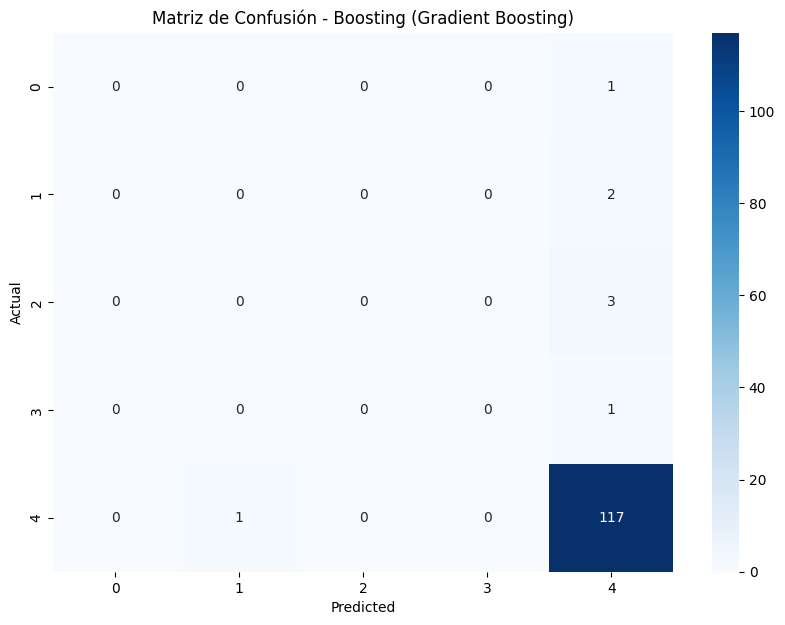

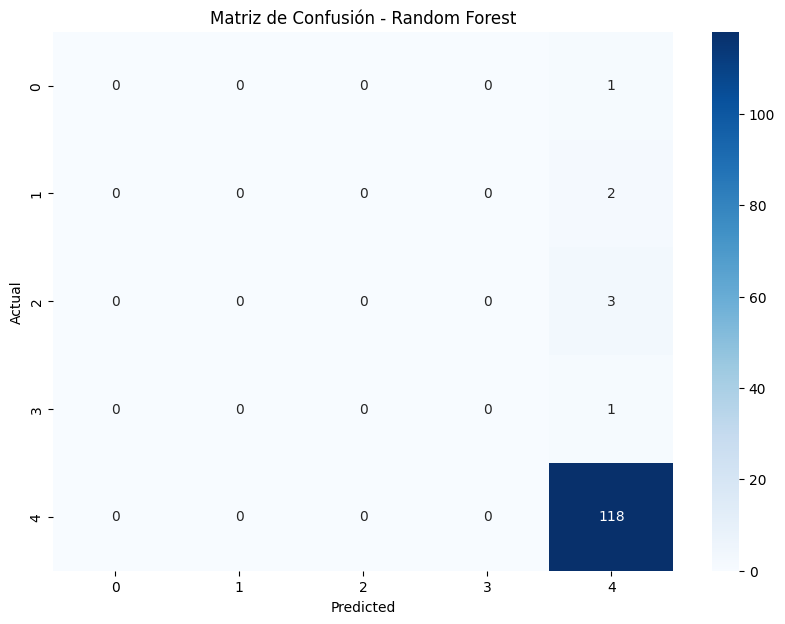

In [61]:
def plot_confusion_matrix_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix_heatmap(y_test, y_pred_boost, "Matriz de Confusión - Boosting (Gradient Boosting)")
plot_confusion_matrix_heatmap(y_test, y_pred_rrff, "Matriz de Confusión - Random Forest")

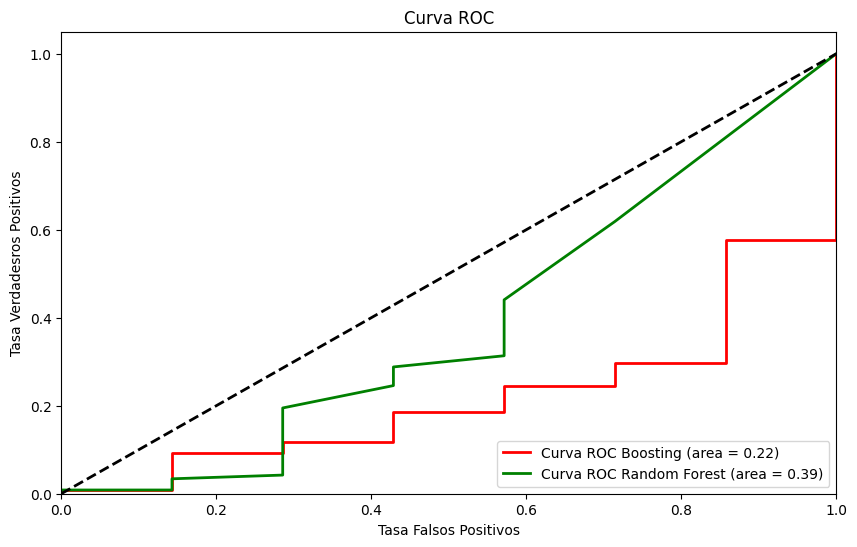

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_boost, tpr_boost, color='red', lw=2, label=f'Curva ROC Boosting (area = {roc_auc_boost:0.2f})')
plt.plot(fpr_rrff, tpr_rrff, color='green', lw=2, label=f'Curva ROC Random Forest (area = {roc_auc_rrff:0.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdadesros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

De acuerdo a las matrices de confusion y sobre todo al grafico de las curvas ROC de cada modelo, el desempeño de ambs es pobre. a continuacion ajustaremos los hiperparametros del modelo Random Forest. Este en este modelo en donde manejamos el sesgo que hay en el data set con respecto a la etnia

 # 5.- Proceso de ensambles (ensemblings) y de ajuste de hiperparámetros

Random Forest

In [63]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

In [64]:
grid_search = GridSearchCV(estimator=modelo_rrff, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


mejor_modelo_rrff = grid_search.best_estimator_


y_pred_best = mejor_modelo_rrff.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_report = classification_report(y_test, y_pred_best)
print(f'Best Accuracy: {best_accuracy}')
print(best_report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Accuracy: 0.944
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           5       0.94      1.00      0.97       118

    accuracy                           0.94       125
   macro avg       0.19      0.20      0.19       125
weighted avg       0.89      0.94      0.92       125



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
y_mejor_prob = mejor_modelo_rrff.predict_proba(X_test_scaled)

In [69]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_mejor_prob.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_mejor_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


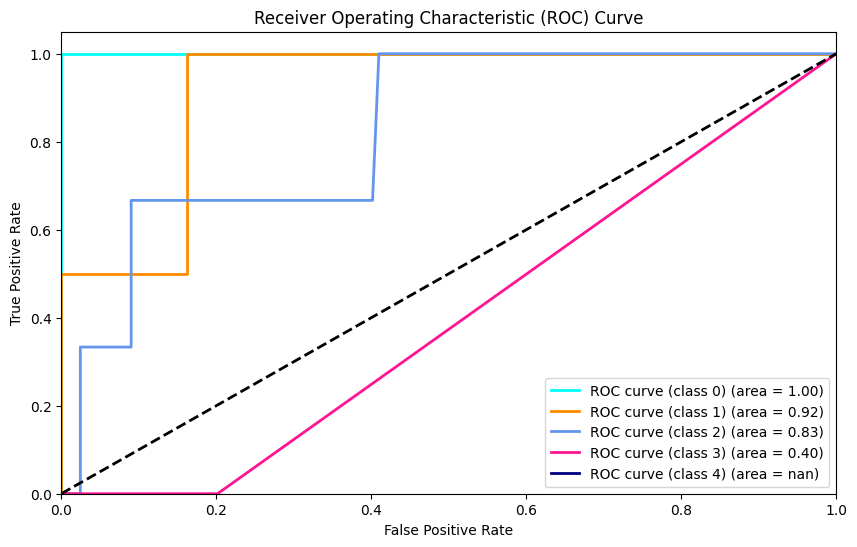

In [70]:
plt.figure(figsize=(10, 6))

colors = ['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy']
for i, color in zip(fpr.keys(), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Despues de ajustar los hiperparametros, vemos que el modelo Raondom Forest funciona sumamente bien para las clases 0, 1 y 2. Pasaremos este modelo a produccion

In [71]:
joblib.dump(mejor_modelo_rrff, 'mejor_modelo_rrff.pkl')

['mejor_modelo_rrff.pkl']

In [72]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
joblib.dump(model_boost, 'modelo_boost.pkl')